In [1]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
import json
import io
import pandas as pd
import seaborn as sns
import requests
from pathlib import Path

# To display all the rows in the df
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds
from rdkit.Chem.PandasTools import AddMoleculeColumnToFrame

In [3]:
df_nh3ton2 = pd.read_pickle('df_nh3ton2.pkl')
AddMoleculeColumnToFrame(df_nh3ton2, smilesCol='smiles')

,smiles,final_dft_opt,scoring_function,postera_score,steps,ROMol
6,CCNC(N)CCF,-35.40,NH3 -> N2,0.080245,1,
8,CNC(N)Cc1ccccc1,-31.20,NH3 -> N2,0.000000,0,
9,CNCCC1(N)CCCCC1,-31.15,NH3 -> N2,0.000000,0,
11,CCC(N)CNc1cccc(S)c1,-29.09,NH3 -> N2,0.081222,1,
13,CCCOC(=O)NCC1(N)CCCCC1,-28.64,NH3 -> N2,0.087442,1,
...,...,...,...,...,...,...
114,NC1(C2CCCCC2)CCCCC1,-13.91,NH3 -> N2,0.000000,0,
116,CNCC(N)c1ccc(CCl)cc1,-13.40,NH3 -> N2,0.090271,1,
117,CC(N)Cc1ccc(CCl)cn1,-13.37,NH3 -> N2,0.081618,1,
118,CCCCN1CCCC(N)(CC)C1,-12.82,NH3 -> N2,0.151494,1,

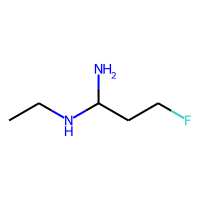
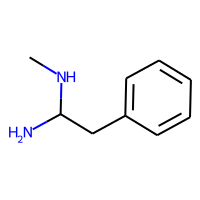
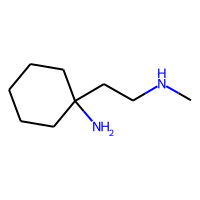
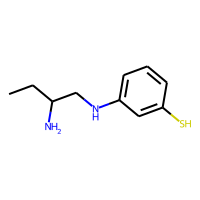
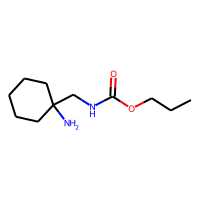
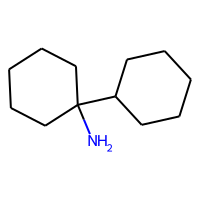
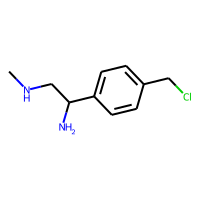
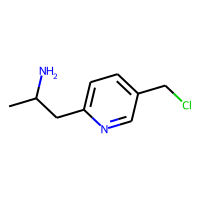
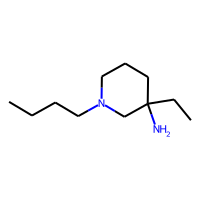
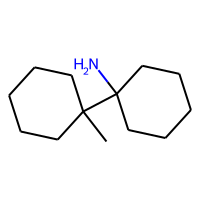

In [4]:
df_nh3ton2

In [5]:
df_reduction_step = pd.read_pickle('df_reduction_step.pkl')
AddMoleculeColumnToFrame(df_reduction_step, smilesCol='smiles')

,smiles,final_dft_opt,scoring_function,postera_score,steps,ROMol
5,N#Cc1cnc(C#N)c(N)c1,-36.50,NH3+ -> NH3,0.000000,0.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
7,N#Cc1ncc(C(=O)CO)cc1N,-31.69,NH3+ -> NH3,NaN,NaN,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
10,N#Cc1ncc(CC(=O)O)cc1N,-30.58,NH3+ -> NH3,0.000000,0.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
12,NC(CC(=S)C=O)c1cccc(F)c1,-28.77,NH3+ -> NH3,0.321623,3.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
17,Nc1ccc(F)c(C(=O)C(=O)C(=O)Cl)c1,-26.87,NH3+ -> NH3,0.179285,2.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
22,Nc1ccccc1N=CC(=O)Cl,-26.13,NH3+ -> NH3,0.175674,2.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
24,Nc1cc(C=O)c(C=O)cc1C=O,-25.48,NH3+ -> NH3,0.165602,2.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
29,Nc1ccc(F)cc1C(=O)C(F)=S,-24.56,NH3+ -> NH3,0.473715,NaN,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
35,Nc1cccc(C(=O)C(=O)Br)n1,-24.05,NH3+ -> NH3,1.000000,NaN,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
40,N#Cc1ccnc(C(=O)Cl)c1N,-23.28,NH3+ -> NH3,1.000000,1.0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

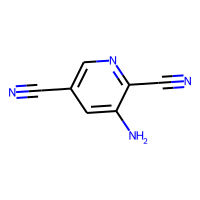
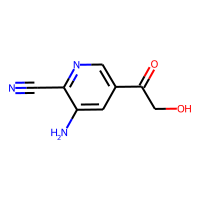
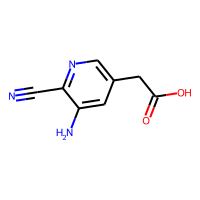
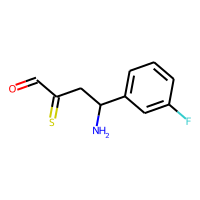
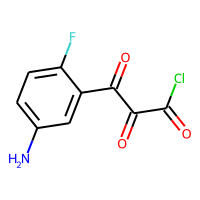
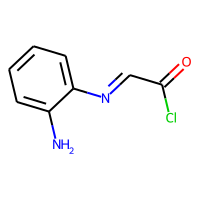
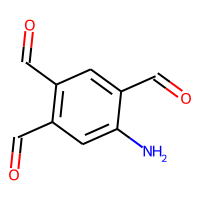
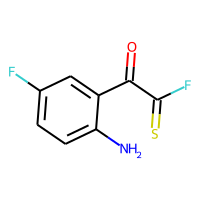
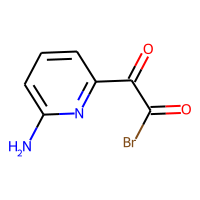
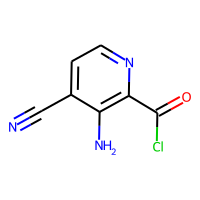
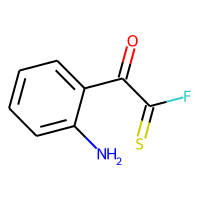
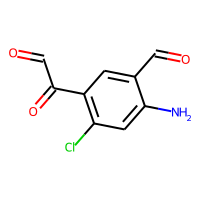
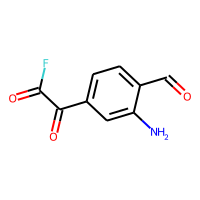
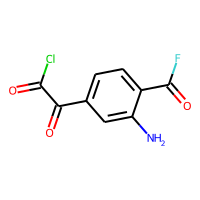
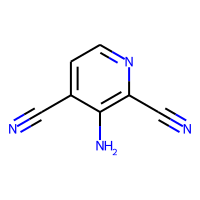
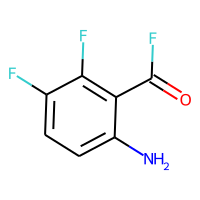
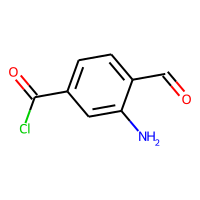
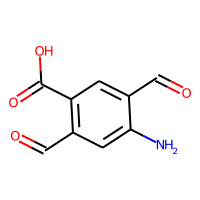
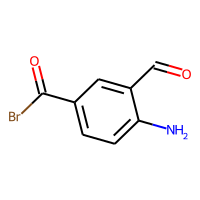
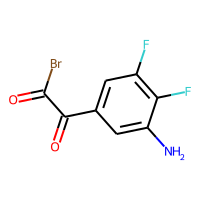
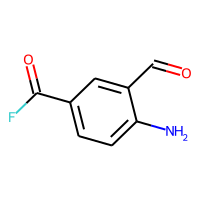
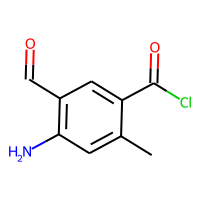
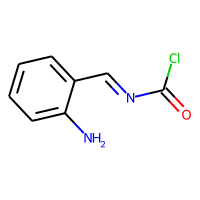
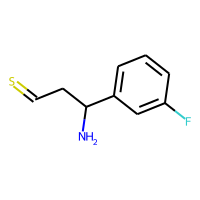
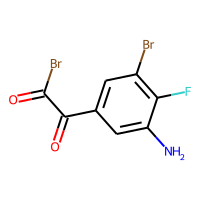
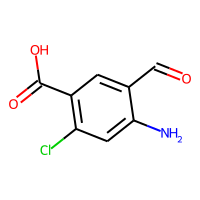
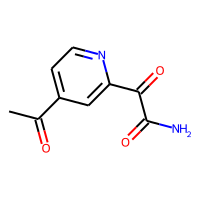
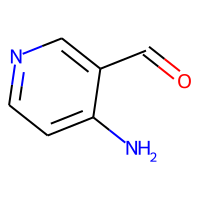
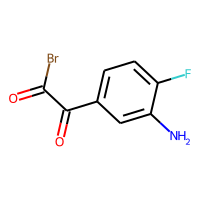
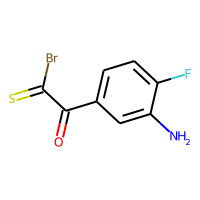
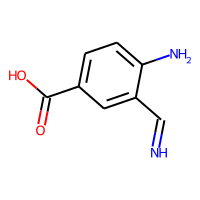
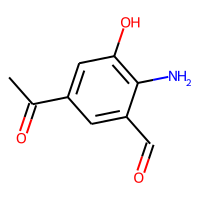
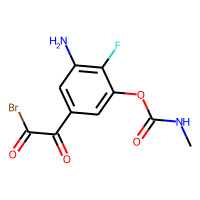

In [6]:
df_reduction_step

,smiles,final_dft_opt,scoring_function,postera_score,steps,ROMol
95,CC(=O)Nc1ccc(F)c(C(=O)Cc2ccnc(N)c2)c1,-17.46,NH3 -> NH3 - N2,0.165679,2,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
105,NCCCOc1ncnc2cccnc12,-15.84,NH3 -> NH3 - N2,0.082370,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
106,NC=NC(=O)c1cccc(Br)c1,-15.61,NH3 -> NH3 - N2,0.085678,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
115,C=C(CCCN)c1n[nH]c2ccccc12,-13.72,NH3 -> NH3 - N2,0.246310,3,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
119,NCCCOc1ccnc2cccnc12,-12.12,NH3 -> NH3 - N2,0.081257,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
126,NCCOC(=O)c1ncnc2ccccc12,-8.33,NH3 -> NH3 - N2,0.092641,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
128,NCCCc1ncnc2ccccc12,-7.58,NH3 -> NH3 - N2,0.081063,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
129,CCc1cccc(C(=O)N=CN)c1,-7.52,NH3 -> NH3 - N2,0.085624,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
132,CC(=O)c1ccc(F)c(C(=O)N=CN)c1,-5.53,NH3 -> NH3 - N2,0.087214,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
134,NCCc1ncnc2ccccc12,-0.33,NH3 -> NH3 - N2,0.081222,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

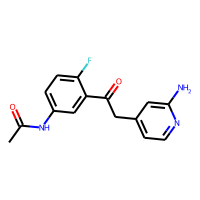
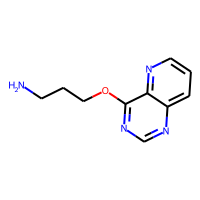
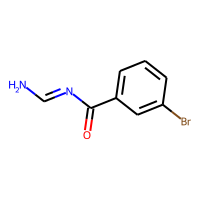
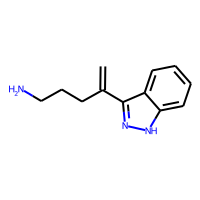
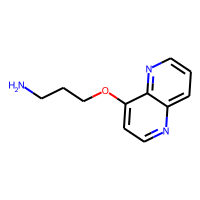
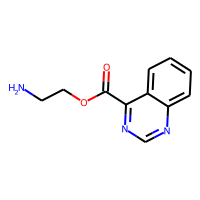
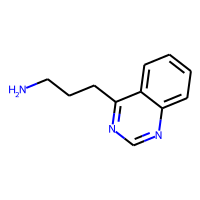
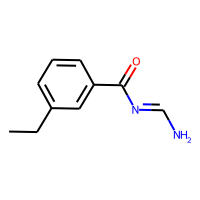
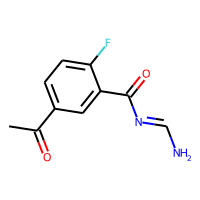
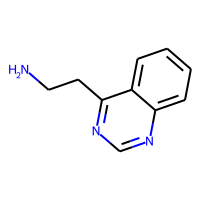
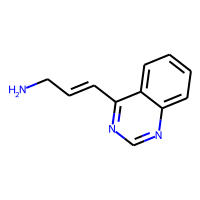
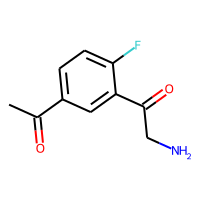
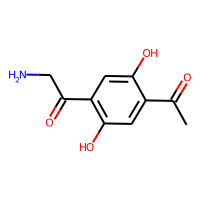

In [7]:
df_n2binding = pd.read_pickle('df_n2binding.pkl')
AddMoleculeColumnToFrame(df_n2binding, smilesCol='smiles')
df_n2binding